In [42]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
s_info =  pd.read_csv('Data/superhero_info - superhero_info.csv')
s_power = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
s_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [5]:
s_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [6]:
s_power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [7]:
s_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


# Data Cleaning for s_info

In [8]:
#split Hero|Publisher in 2 seperate columns
s_info[['hero', 'publisher']] = s_info['Hero|Publisher'].str.split('|', expand=True)

In [9]:
#drop Hero|Publisher column
s_info.drop('Hero|Publisher',axis=1,inplace=True) 

In [10]:
s_info.columns = s_info.columns.str.lower()

In [11]:
s_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        463 non-null    object
 1   race          463 non-null    object
 2   alignment     463 non-null    object
 3   hair color    463 non-null    object
 4   eye color     463 non-null    object
 5   skin color    463 non-null    object
 6   measurements  463 non-null    object
 7   hero          463 non-null    object
 8   publisher     463 non-null    object
dtypes: object(9)
memory usage: 32.7+ KB


In [12]:
s_power.columns = s_power.columns.str.lower()

In [13]:
s_info['measurements'] = s_info['measurements'].str.replace("'", '"')
s_info['measurements'] = s_info['measurements'].apply(json.loads)
s_info['measurements'].apply(pd.Series)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
5,185.0 cm,88.0 kg
6,178.0 cm,81.0 kg
7,191.0 cm,104.0 kg
8,188.0 cm,108.0 kg
9,193.0 cm,90.0 kg


In [14]:
s_info = pd.concat([s_info, s_info['measurements'].apply(pd.Series)], axis = 1)

In [15]:
s_info.drop('measurements', axis = 1, inplace = True)

In [16]:
s_info.columns = s_info.columns.str.lower()

In [17]:
s_info.head()

,gender,race,alignment,hair color,eye color,skin color,hero,publisher,height,weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [18]:
s_info['height'] = s_info['height'].str.replace(' cm','')  
s_info.rename(columns={'height':'height(cm)'}, inplace=True)

In [19]:
s_info['weight'] = s_info['weight'].str.replace(' kg','')
s_info.rename(columns={'weight':'weight(kg)'}, inplace= True)

In [20]:
s_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      463 non-null    object
 1   race        463 non-null    object
 2   alignment   463 non-null    object
 3   hair color  463 non-null    object
 4   eye color   463 non-null    object
 5   skin color  463 non-null    object
 6   hero        463 non-null    object
 7   publisher   463 non-null    object
 8   height(cm)  463 non-null    object
 9   weight(kg)  463 non-null    object
dtypes: object(10)
memory usage: 36.3+ KB


In [21]:
s_info['height(cm)'] = s_info['height(cm)'].astype(float)
s_info['weight(kg)'] = s_info['weight(kg)'].astype(float)

In [22]:
s_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      463 non-null    object 
 1   race        463 non-null    object 
 2   alignment   463 non-null    object 
 3   hair color  463 non-null    object 
 4   eye color   463 non-null    object 
 5   skin color  463 non-null    object 
 6   hero        463 non-null    object 
 7   publisher   463 non-null    object 
 8   height(cm)  463 non-null    float64
 9   weight(kg)  463 non-null    float64
dtypes: float64(2), object(8)
memory usage: 36.3+ KB


# Data Cleaning for s_power

In [23]:
s_power.head()

,hero_names,powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [24]:
s_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [25]:
s_power.columns = s_power.columns.str.lower()

In [26]:
s_power['powers'].value_counts()

Intelligence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        8
Durability,Super Strength                                                                                                                                                                                                                                                                                                                         

In [27]:
test = s_power.loc [7, 'powers']
test

'Accelerated Healing,Immortality,Regeneration'

In [28]:
s_power['power_split'] = s_power['powers'].str.split(",")

In [29]:
exploded = s_power.explode('power_split')
exploded.head()

,hero_names,powers,power_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [30]:
# obtain unique names of cols to create one-hot-encode cols
cols_to_make = exploded['power_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [31]:
# create new one-hot-encoded columns
for col in cols_to_make:
    s_power[col]=s_power['powers'].str.contains(col) 
s_power.head()

C:\Users\black\AppData\Local\Temp\ipykernel_7476\1604752356.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  s_power[col]=s_power['powers'].str.contains(col)
C:\Users\black\AppData\Local\Temp\ipykernel_7476\1604752356.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  s_power[col]=s_power['powers'].str.contains(col)
C:\Users\black\AppData\Local\Temp\ipykernel_7476\1604752356.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

,hero_names,powers,power_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,Cold Resistance,Underwater breathing,Marksmanship,Weapons Master,Intelligence,Telepathy,Immortality,Reflexes,Enhanced Sight,Sub-Mariner,Lantern Power Ring,Invulnerability,Animation,Super Breath,Dimensional Awareness,Flight,Size Changing,Teleportation,Magic,Dimensional Travel,Molecular Manipulation,Energy Manipulation,Power Cosmic,Energy Absorption,Elemental Transmogrification,Fire Resistance,Natural Armor,Heat Resistance,Matter Absorption,Regeneration,Stealth,Power Suit,Energy Blasts,Energy Beams,Heat Generation,Danger Sense,Phasing,Force Fields,Hypnokinesis,Invisibility,Enhanced Senses,Jump,Shapeshifting,Elasticity,Substance Secretion,Enhanced Hearing,Adaptation,Gliding,Natural Weapons,Wallcrawling,Vision - Thermal,Power Augmentation,Cryokinesis,Duplication,Weapon-based Powers,Fire Control,Enhanced Memory,Energy Constructs,Power Absorption,Time Travel,Enhanced Smell,Water Control,Vision - Telescopic,Magnetism,Vision - Microscopic,Vision - Night,Vision - Heat,Vision - X-Ray,Psionic Powers,Toxin and Disease Resistance,Animal Attributes,Animal Oriented Powers,Toxin and Disease Control,Empathy,Animal Control,Darkforce Manipulation,Time Manipulation,Reality Warping,Web Creation,Symbiote Costume,Telekinesis,Levitation,Biokinesis,Sonar,Enhanced Touch,Seismic Power,Energy Armor,Omnilingualism,Radiation Immunity,Density Control,Light Control,Illumination,Molecular Combustion,Astral Travel,Precognition,Intangibility,Illusions,Audio Control,Sonic Scream,Peak Human Condition,Vision - Infrared,Dexterity,Omnitrix,Omnipotent,Possession,Energy Resistance,Vision - Cryo,Mind Control,Mind Blast,Clairvoyance,Probability Manipulation,Death Touch,Electrokinesis,Gravity Control,Technopath/Cyberpath,Radar Sense,Astral Projection,Cloaking,Telepathy Resistance,Mind Control Resistance,Hyperkinesis,Spatial Awareness,Radiation Control,Radiation Absorption,Magic Resistance,Element Control,Plant Control,Terrakinesis,Power Sense,Wind Control,Qwardian Power Ring,Echolocation,Resurrection,The Force,Summoning,Banish,Molecular Dissipation,Electrical Transport,Speed Force,Grim Reaping,Portal Creation,Vitakinesis,Projection,Insanity,Photographic Reflexes,Anti-Gravity,Thirstokinesis,Power Nullifier,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [32]:
s_power.drop(columns={'powers', 'power_split'}, inplace =True)

In [34]:
s_power.columns = s_power.columns.str.lower()

# Merge 2 dataframe

In [35]:
s_merge = pd.merge (s_info, s_power, left_on='hero', right_on='hero_names')
s_merge.head()

,gender,race,alignment,hair color,eye color,skin color,hero,publisher,height(cm),weight(kg),hero_names,agility,super strength,stamina,super speed,accelerated healing,durability,longevity,camouflage,self-sustenance,cold resistance,underwater breathing,marksmanship,weapons master,intelligence,telepathy,immortality,reflexes,enhanced sight,sub-mariner,lantern power ring,invulnerability,animation,super breath,dimensional awareness,flight,size changing,teleportation,magic,dimensional travel,molecular manipulation,energy manipulation,power cosmic,energy absorption,elemental transmogrification,fire resistance,natural armor,heat resistance,matter absorption,regeneration,stealth,power suit,energy blasts,energy beams,heat generation,danger sense,phasing,force fields,hypnokinesis,invisibility,enhanced senses,jump,shapeshifting,elasticity,substance secretion,enhanced hearing,adaptation,gliding,natural weapons,wallcrawling,vision - thermal,power augmentation,cryokinesis,duplication,weapon-based powers,fire control,enhanced memory,energy constructs,power absorption,time travel,enhanced smell,water control,vision - telescopic,magnetism,vision - microscopic,vision - night,vision - heat,vision - x-ray,psionic powers,toxin and disease resistance,animal attributes,animal oriented powers,toxin and disease control,empathy,animal control,darkforce manipulation,time manipulation,reality warping,web creation,symbiote costume,telekinesis,levitation,biokinesis,sonar,enhanced touch,seismic power,energy armor,omnilingualism,radiation immunity,density control,light control,illumination,molecular combustion,astral travel,precognition,intangibility,illusions,audio control,sonic scream,peak human condition,vision - infrared,dexterity,omnitrix,omnipotent,possession,energy resistance,vision - cryo,mind control,mind blast,clairvoyance,probability manipulation,death touch,electrokinesis,gravity control,technopath/cyberpath,radar sense,astral projection,cloaking,telepathy resistance,mind control resistance,hyperkinesis,spatial awareness,radiation control,radiation absorption,magic resistance,element control,plant control,terrakinesis,power sense,wind control,qwardian power ring,echolocation,resurrection,the force,summoning,banish,molecular dissipation,electrical transport,speed force,grim reaping,portal creation,vitakinesis,projection,insanity,photographic reflexes,anti-gravity,thirstokinesis,power nullifier,weather control,omnipresent,omniscient,hair manipulation,nova force,odin force,phoenix force,intuitive aptitude,melting,changing armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,A-Bomb,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,Abe Sapien,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [37]:
s_merge.drop('hero_names', inplace = True, axis = 1)

C:\Users\black\AppData\Local\Temp\ipykernel_7476\1308819666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_merge.drop('hero_names', inplace = True, axis = 1)


In [36]:
#bring column: hero to the front 
##by transform columns to list then set the index of hero to 0
columns = s_merge.columns.tolist()
columns.insert(0, columns.pop(columns.index('hero')))
s_merge = s_merge[columns]

In [38]:
s_merge.head()

,hero,gender,race,alignment,hair color,eye color,skin color,publisher,height(cm),weight(kg),agility,super strength,stamina,super speed,accelerated healing,durability,longevity,camouflage,self-sustenance,cold resistance,underwater breathing,marksmanship,weapons master,intelligence,telepathy,immortality,reflexes,enhanced sight,sub-mariner,lantern power ring,invulnerability,animation,super breath,dimensional awareness,flight,size changing,teleportation,magic,dimensional travel,molecular manipulation,energy manipulation,power cosmic,energy absorption,elemental transmogrification,fire resistance,natural armor,heat resistance,matter absorption,regeneration,stealth,power suit,energy blasts,energy beams,heat generation,danger sense,phasing,force fields,hypnokinesis,invisibility,enhanced senses,jump,shapeshifting,elasticity,substance secretion,enhanced hearing,adaptation,gliding,natural weapons,wallcrawling,vision - thermal,power augmentation,cryokinesis,duplication,weapon-based powers,fire control,enhanced memory,energy constructs,power absorption,time travel,enhanced smell,water control,vision - telescopic,magnetism,vision - microscopic,vision - night,vision - heat,vision - x-ray,psionic powers,toxin and disease resistance,animal attributes,animal oriented powers,toxin and disease control,empathy,animal control,darkforce manipulation,time manipulation,reality warping,web creation,symbiote costume,telekinesis,levitation,biokinesis,sonar,enhanced touch,seismic power,energy armor,omnilingualism,radiation immunity,density control,light control,illumination,molecular combustion,astral travel,precognition,intangibility,illusions,audio control,sonic scream,peak human condition,vision - infrared,dexterity,omnitrix,omnipotent,possession,energy resistance,vision - cryo,mind control,mind blast,clairvoyance,probability manipulation,death touch,electrokinesis,gravity control,technopath/cyberpath,radar sense,astral projection,cloaking,telepathy resistance,mind control resistance,hyperkinesis,spatial awareness,radiation control,radiation absorption,magic resistance,element control,plant control,terrakinesis,power sense,wind control,qwardian power ring,echolocation,resurrection,the force,summoning,banish,molecular dissipation,electrical transport,speed force,grim reaping,portal creation,vitakinesis,projection,insanity,photographic reflexes,anti-gravity,thirstokinesis,power nullifier,weather control,omnipresent,omniscient,hair manipulation,nova force,odin force,phoenix force,intuitive aptitude,melting,changing armor
0,A-Bomb,Male,Human,good,No Hair,yellow,Unknown,Marvel Comics,203.0,441.0,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,Icthyo Sapien,good,No Hair,blue,blue,Dark Horse Comics,191.0,65.0,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

# Compare average weight of super speed superheroes to others

In [82]:
super_speed_avg_weight = s_merge.groupby('super speed')['weight(kg)'].mean().round(2)

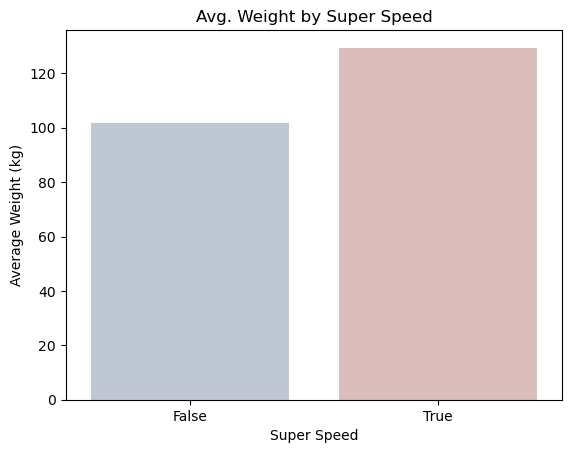

In [83]:
#reset index for plotting 
super_speed_avg_weight = super_speed_avg_weight.reset_index()
# Create the plot using seaborn
sns.barplot(x='super speed', y='weight(kg)', data=super_speed_avg_weight, palette = 'vlag')
plt.xlabel('Super Speed')
plt.ylabel('Average Weight (kg)')
plt.title('Avg. Weight by Super Speed')
plt.show();

-  Surprisingly, super heroes with super speed are actually more heavy than others without this super power.

# Compare average height by publishers

In [84]:
avg_height_by_publishers = s_merge.groupby('publisher')['height(cm)'].mean().round(2)

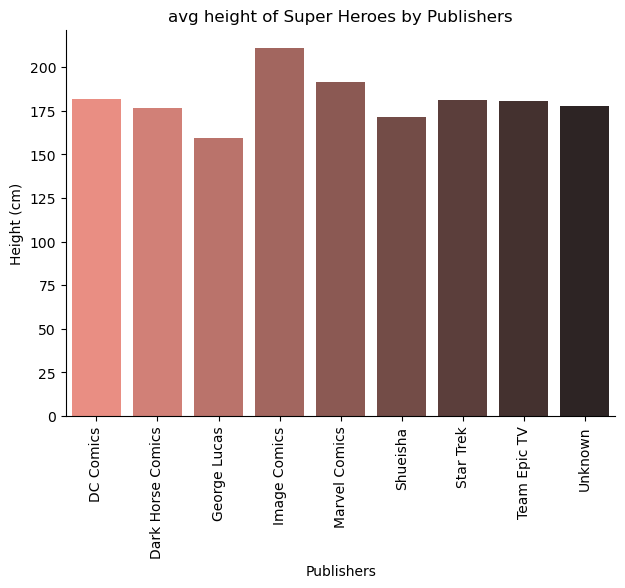

In [85]:
#reset index for plotting
avg_height_by_publishers = avg_height_by_publishers.reset_index()
sns.barplot(x='publisher', y='height(cm)', data=avg_height_by_publishers, palette = 'dark:salmon_r')
plt.xlabel('Publishers')
plt.ylabel('Height (cm)')
plt.title('avg height of Super Heroes by Publishers')

# Adjust plot aesthetics
sns.despine()  # Remove the top and right spines
plt.tight_layout()  # Improve the spacing between elements
plt.xticks(rotation = 90)
# Show the plot
plt.show()

- Tallest superheroes are from Image Comics
- On the other side, George Lucas are the shortest.